In [1]:
#import packages
import numpy as np
import pandas as pd 
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from matplotlib.colors import ListedColormap

In [4]:
#import previous data csv & check
data = pd.read_csv("data.csv", index_col=[0])

In [5]:
data.head()

,title,company,location,summary,mean_salary
0,lead data scientist (technical lead and team l...,Home Office,Sheffield,ideally you will have a background in working ...,57613.0
1,data scientist,Lumilinks,United Kingdom•Remote,the science team at lumilinks is led by dr. ti...,37500.0
2,text analyst / data scientist,Health & Safety Executive,Sheffield•Remote,"previous experience as a text analyst, data sc...",42599.5
3,research associate in developing data-analytic...,University of Sheffield,Sheffield,insight from data generated in experiments and...,36635.5
4,research associate in machine learning for med...,University of Sheffield,Sheffield,learning software tool on our large-scale card...,36635.5


In [6]:
#understand the mean salary dataset better 
data['mean_salary'].describe()

count      1246.000000
mean      45752.645265
std       19605.665278
min       12500.000000
25%       32500.000000
50%       42500.000000
75%       55000.000000
max      150000.000000
Name: mean_salary, dtype: float64

/Users/terri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


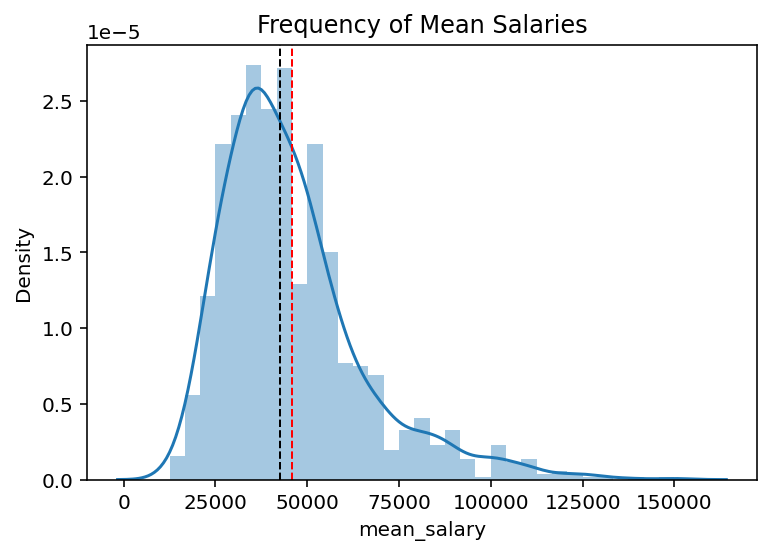

In [7]:
#plot the frequency of the mean salaries
sns.distplot(data["mean_salary"])
plt.title("Frequency of Mean Salaries")
plt.axvline(data["mean_salary"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(data["mean_salary"].median(), color='black', linestyle='dashed', linewidth=1)
plt.show()

In [8]:
#define mean salary high vs low - I am just using the median here. 
median = data['mean_salary'].median()

In [9]:
def salary_class (x, median=median):
    if x > median:
        return 'high salary'
    else:
        return 'low salary'

In [10]:
#put this into the dataframe
data['salary'] = data['mean_salary'].apply(salary_class)

In [11]:
data

,title,company,location,summary,mean_salary,salary
0,lead data scientist (technical lead and team l...,Home Office,Sheffield,ideally you will have a background in working ...,57613.0,high salary
1,data scientist,Lumilinks,United Kingdom•Remote,the science team at lumilinks is led by dr. ti...,37500.0,low salary
2,text analyst / data scientist,Health & Safety Executive,Sheffield•Remote,"previous experience as a text analyst, data sc...",42599.5,high salary
3,research associate in developing data-analytic...,University of Sheffield,Sheffield,insight from data generated in experiments and...,36635.5,low salary
4,research associate in machine learning for med...,University of Sheffield,Sheffield,learning software tool on our large-scale card...,36635.5,low salary
...,...,...,...,...,...,...
560,marketing insight analyst,Harnham,Nottingham,both own and promote campaign data visualizati...,45000.0,high salary
562,test analyst (business process testing),Momentum Security Recruitment,Nottingham+2 locations•Remote,understanding of data creation and manipulatio...,26000.0,low salary
569,business test analyst,Momentum Security Recruitment,Nottingham•Remote,understanding of data creation and manipulatio...,25000.0,low salary
570,etl focused data analyst - triple growth busin...,Interface Recruitment,Nottingham,extract and transform data from our bespoke er...,32000.0,low salary


In [12]:
# how many values are in each category?
data['salary'].value_counts()


low salary     659
high salary    587
Name: salary, dtype: int64

In [13]:
#what is our baseline accuracy?
round((data[(data['salary'] == 'low salary')].shape[0] / data.shape[0]) * 100, 2)

52.89

In [14]:
#Create custom dummies from location column
London = data['location'].apply(lambda x: 1 if 'london' in x or 'London' in x else 0)
Birmingham = data['location'].apply(lambda x: 1 if 'Birmingham' in x or 'birmingham' in x else 0)
Bristol = data['location'].apply(lambda x: 1 if 'Bristol' in x or 'bristol' in x else 0)
Glasgow = data['location'].apply(lambda x: 1 if 'glasgow' in x or 'Glasgow' in x else 0)
Edinburgh = data['location'].apply(lambda x: 1 if 'edinburgh' in x or 'Edinburgh' in x else 0)
Manchester = data['location'].apply(lambda x: 1 if 'manchester' in x or 'Manchester' in x else 0)
Leeds = data['location'].apply(lambda x: 1 if 'Leeds' in x or 'leeds' in x else 0)
Cardiff = data['location'].apply(lambda x: 1 if 'Cardiff' in x or 'cardiff' in x else 0)
Nottingham = data['location'].apply(lambda x: 1 if 'nottingham' in x or 'Nottingham' in x else 0)
Newcastle = data['location'].apply(lambda x: 1 if 'newcastle' in x or 'Newcastle' in x else 0)
Belfast = data['location'].apply(lambda x: 1 if 'Belfast' in x or 'belfast' in x else 0)
Sheffield = data['location'].apply(lambda x: 1 if 'sheffield' in x or 'Sheffield' in x else 0)
Southampton = data['location'].apply(lambda x: 1 if 'southampton' in x or 'Southampton' in x else 0)

In [15]:
# Create column from custom dummies from title column
locations = pd.DataFrame({'London': London, 'Birmingham': Birmingham, 'Bristol': Bristol, 'Glasgow': Glasgow,
                         'Edinburgh': Edinburgh, 'Manchester': Manchester, 'Leeds': Leeds, 'Cardiff': Cardiff,
                         'Nottingham': Nottingham, 'Newcastle': Newcastle, 'Belfast': Belfast, 'Sheffield': Sheffield,
                         'Southampton': Southampton})

# Print created dataframe shape and head
print(locations.shape)
locations.head()

(1246, 13)


,London,Birmingham,Bristol,Glasgow,Edinburgh,Manchester,Leeds,Cardiff,Nottingham,Newcastle,Belfast,Sheffield,Southampton
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
#put the dataframes together
salaryxlocation = pd.concat([locations, data], axis=1)
salaryxlocation

,London,Birmingham,Bristol,Glasgow,Edinburgh,Manchester,Leeds,Cardiff,Nottingham,Newcastle,Belfast,Sheffield,Southampton,title,company,location,summary,mean_salary,salary
0,0,0,0,0,0,0,0,0,0,0,0,1,0,lead data scientist (technical lead and team l...,Home Office,Sheffield,ideally you will have a background in working ...,57613.0,high salary
1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,Lumilinks,United Kingdom•Remote,the science team at lumilinks is led by dr. ti...,37500.0,low salary
2,0,0,0,0,0,0,0,0,0,0,0,1,0,text analyst / data scientist,Health & Safety Executive,Sheffield•Remote,"previous experience as a text analyst, data sc...",42599.5,high salary
3,0,0,0,0,0,0,0,0,0,0,0,1,0,research associate in developing data-analytic...,University of Sheffield,Sheffield,insight from data generated in experiments and...,36635.5,low salary
4,0,0,0,0,0,0,0,0,0,0,0,1,0,research associate in machine learning for med...,University of Sheffield,Sheffield,learning software tool on our large-scale card...,36635.5,low salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,0,0,0,0,0,0,0,1,0,0,0,0,marketing insight analyst,Harnham,Nottingham,both own and promote campaign data visualizati...,45000.0,high salary
562,0,0,0,0,0,0,0,0,1,0,0,0,0,test analyst (business process testing),Momentum Security Recruitment,Nottingham+2 locations•Remote,understanding of data creation and manipulatio...,26000.0,low salary
569,0,0,0,0,0,0,0,0,1,0,0,0,0,business test analyst,Momentum Security Recruitment,Nottingham•Remote,understanding of data creation and manipulatio...,25000.0,low salary
570,0,0,0,0,0,0,0,0,1,0,0,0,0,etl focused data analyst - triple growth busin...,Interface Recruitment,Nottingham,extract and transform data from our bespoke er...,32000.0,low salary


# 3. Modelling

In [17]:
#create target and feature variables
#first using location as the feature variable
X = salaryxlocation[['London', 'Birmingham', 'Bristol', 'Glasgow', 'Edinburgh', 
                     'Manchester', 'Leeds', 'Cardiff', 'Nottingham', 'Newcastle',
                     'Belfast', 'Sheffield', 'Southampton']]
y = salaryxlocation['salary']

In [18]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.2, random_state=1)

In [19]:
#scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### 3.1 Logistic Regression

In [24]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')

In [25]:
#set up parameters for a grid search on logistic regression to find the best parameters
params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

In [26]:
#set up the gridsearch
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

In [27]:
#fit the model
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [28]:
#find the best result from logistic regression

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.19306977288832497, 'fit_intercept': True, 'penalty': 'l1'}
Best estimator C:
0.19306977288832497
Best estimator mean cross validated training score:
0.607462311557789
Best estimator score on the full training set:
0.6114457831325302
Best estimator score on the test set:
0.568
Best estimator coefficients:
[[-0.40058517 -0.28192731 -0.10495674  0.         -0.04657692  0.01521999
   0.01377922 -0.00455897  0.02652888 -0.06164761  0.01797716 -0.00257198
  -0.14309787]]


The mean cross validated training score is 60.75 which is better than our baseline accuracy of 52.89. 

In [29]:
#get the predictions for the training and test data
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)

In [30]:
#our classification report for the training set
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

 high salary       0.59      0.57      0.58       469
  low salary       0.63      0.65      0.64       527

    accuracy                           0.61       996
   macro avg       0.61      0.61      0.61       996
weighted avg       0.61      0.61      0.61       996



In [31]:
#our classification report for the test set
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

 high salary       0.54      0.59      0.56       118
  low salary       0.60      0.55      0.57       132

    accuracy                           0.57       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.57      0.57      0.57       250



In [32]:
print(confusion_matrix(y_test, predictions_test, labels=['high salary','low salary']))

[[70 48]
 [60 72]]


### 3.2 Decision Tree Classifier

In [33]:
#using grid search to find the best decision tree classifier
# gridsearch params
dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01]
}

# set the gridsearch
model = DecisionTreeClassifier()
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1)

In [37]:
# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

Fitting 5 folds for each of 1936 candidates, totalling 9680 fits
{'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 3, 'min_samples_split': 10}
0.6104572864321609


With the decision tree classifier we return the best score of 61.05 
which is better than our baseline accuracy of 52.89 and our logistic regression model.

In [38]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
0,London,0.375636
1,Birmingham,0.327557
5,Manchester,0.186156
12,Southampton,0.110650
2,Bristol,0.000000
3,Glasgow,0.000000
4,Edinburgh,0.000000
6,Leeds,0.000000
7,Cardiff,0.000000
8,Nottingham,0.000000


[Text(0, 0, 'London'),
 Text(1, 0, 'Birmingham'),
 Text(2, 0, 'Manchester'),
 Text(3, 0, 'Southampton'),
 Text(4, 0, 'Bristol'),
 Text(5, 0, 'Glasgow'),
 Text(6, 0, 'Edinburgh'),
 Text(7, 0, 'Leeds'),
 Text(8, 0, 'Cardiff'),
 Text(9, 0, 'Nottingham'),
 Text(10, 0, 'Newcastle'),
 Text(11, 0, 'Belfast'),
 Text(12, 0, 'Sheffield')]

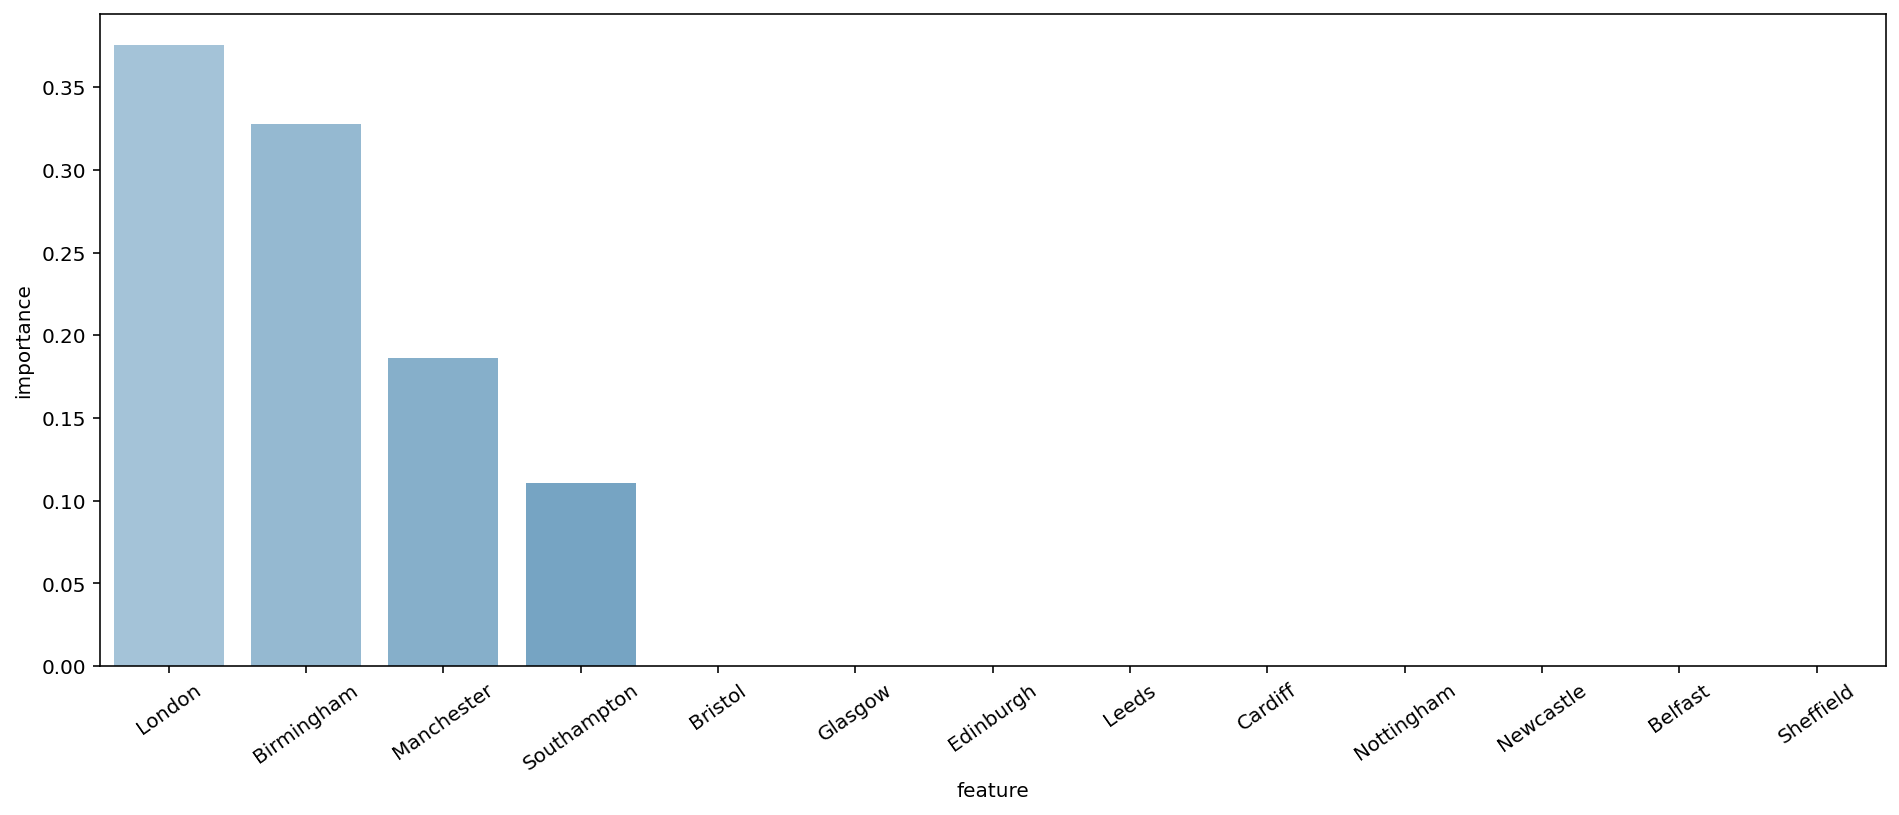

In [39]:
#graph the most important features
#as we can see - London followed by Manchester, Nottingham, Belfast and Glasgow have the greatest effect on whether a salary is deemed to be high or low. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure().set_size_inches(16, 6)
fg = sns.barplot(x='feature', y='importance',data=fi, palette="Blues_d")
fg.set_xticklabels(rotation=35, labels=fi.feature)

### 3.3 Logistic regression on more features

In [40]:
#Create custom dummies from title column including features that may be of interest to us and may affect whether a salary is deemed high or low
senior = data['title'].apply(lambda x: 1 if 'senior' in x or 'Senior' in x else 0)
lead = data['title'].apply(lambda x: 1 if 'lead' in x or 'Lead' in x else 0)
research = data['title'].apply(lambda x: 1 if 'research' in x or 'Research' in x else 0)
lecturer = data['title'].apply(lambda x: 1 if 'lecturer' in x or 'Lecturer' in x else 0)
head = data['title'].apply(lambda x: 1 if 'head' in x or 'Head' in x else 0)
manager = data['title'].apply(lambda x: 1 if 'manager' in x or 'Manager' in x else 0)
consultant = data['title'].apply(lambda x: 1 if 'consultant' in x or 'Consultant' in x else 0)
specialist = data['title'].apply(lambda x: 1 if 'specialist' in x or 'Specialist' in x else 0)
graduate = data['title'].apply(lambda x: 1 if 'graduate' in x or 'Graduate' in x else 0)
intern = data['title'].apply(lambda x: 1 if 'intern' in x or 'Intern' in x else 0)
junior = data['title'].apply(lambda x: 1 if 'junior' in x or 'Junior' in x else 0)
analyst = data['title'].apply(lambda x: 1 if 'analyst' in x or 'Analyst' in x else 0)
scientist = data['title'].apply(lambda x: 1 if 'scientist' in x or 'Scientist' in x else 0)

In [41]:
# Create column from custom dummies from title column
titles = pd.DataFrame({'senior': senior, 'lead': lead, 'research': research, 'lecturer': lecturer,
                         'head': head, 'manager': manager, 'consultant': consultant, 'specialist': specialist,
                         'graduate': graduate, 'intern': intern, 'junior': junior, 'analyst':analyst, 'scientist':scientist})

In [42]:
#concat the data
salaryxtitles = pd.concat([salaryxlocation, data, titles], axis=1)
salaryxtitles

,London,Birmingham,Bristol,Glasgow,Edinburgh,Manchester,Leeds,Cardiff,Nottingham,Newcastle,...,lecturer,head,manager,consultant,specialist,graduate,intern,junior,analyst,scientist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
562,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
569,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
570,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
list(salaryxtitles.columns)

['London',
 'Birmingham',
 'Bristol',
 'Glasgow',
 'Edinburgh',
 'Manchester',
 'Leeds',
 'Cardiff',
 'Nottingham',
 'Newcastle',
 'Belfast',
 'Sheffield',
 'Southampton',
 'title',
 'company',
 'location',
 'summary',
 'mean_salary',
 'salary',
 'title',
 'company',
 'location',
 'summary',
 'mean_salary',
 'salary',
 'senior',
 'lead',
 'research',
 'lecturer',
 'head',
 'manager',
 'consultant',
 'specialist',
 'graduate',
 'intern',
 'junior',
 'analyst',
 'scientist']

In [44]:
#delete any rows that are duplicated 
salaryxtitles = salaryxtitles.loc[:,~salaryxtitles.columns.duplicated()]

In [45]:
#check the titles of the rows. 
list(salaryxtitles.columns)

['London',
 'Birmingham',
 'Bristol',
 'Glasgow',
 'Edinburgh',
 'Manchester',
 'Leeds',
 'Cardiff',
 'Nottingham',
 'Newcastle',
 'Belfast',
 'Sheffield',
 'Southampton',
 'title',
 'company',
 'location',
 'summary',
 'mean_salary',
 'salary',
 'senior',
 'lead',
 'research',
 'lecturer',
 'head',
 'manager',
 'consultant',
 'specialist',
 'graduate',
 'intern',
 'junior',
 'analyst',
 'scientist']

In [46]:
#create new target and feature variables
Xv = salaryxtitles[['London', 'Birmingham', 'Bristol', 'Glasgow', 'Edinburgh', 
                     'Manchester', 'Leeds', 'Cardiff', 'Nottingham', 'Newcastle',
                     'Belfast', 'Sheffield', 'Southampton', 'senior', 'lead', 'research', 'lecturer',
                         'head', 'manager', 'consultant', 'specialist',
                         'graduate', 'intern', 'junior', 'analyst', 'scientist']]
yv = salaryxtitles['salary']

In [47]:
#train test split
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv,
                        stratify=y, test_size=0.2, random_state=1)

In [48]:
#scale the data
scaler = StandardScaler()

Xv_train = scaler.fit_transform(Xv_train)
Xv_test = scaler.transform(Xv_test)

Xv_train = pd.DataFrame(Xv_train, columns=Xv.columns)
Xv_test = pd.DataFrame(Xv_test, columns=Xv.columns)

In [49]:
#firstly use a grid search to find the best Logistic Regression model
modelv = LogisticRegression(solver='liblinear', multi_class='ovr')

In [50]:
#set the parameters
paramsv = {'C': np.linspace(0.1,12,1000),
          'penalty': ['l1', 'l2']}

In [51]:
gsv = GridSearchCV(modelv, 
                    param_grid = paramsv, 
                    verbose=1,  
                    cv=5,
                    return_train_score=True)
                                
gsv.fit(Xv_train, yv_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': array([ 0.1       ,  0.11191191,  0.12382382,  0.13573574,  0.14764765,
        0.15955956,  0.17147147,  0.18338338,  0.1952953 ,  0.20720721,
        0.21911912,  0.23103103,  0.24294294,  0.25485485,  0.26676677,
        0.27867868,  0.29059059,  0.3025025 ,  0.31441441,  0.32632633,
        0.33823824,  0.35015015,  0.3620620...
       11.65455455, 11.66646647, 11.67837838, 11.69029029, 11.7022022 ,
       11.71411411, 11.72602603, 11.73793794, 11.74984985, 11.76176176,
       11.77367367, 11.78558559, 11.7974975 , 11.80940941, 11.82132132,
       11.83323323, 11.84514515, 11.85705706, 11.86896897, 11.88088088,
       11.89279279, 11.9047047 , 11.91661662, 11.92852853, 11.94044044,
       11.95235235, 11.96426426, 11.97617618, 11.98808809, 12.        ]),
                         'penalty': ['l1', 'l2']},
       

In [52]:
# and find the best results based on the best grid search parameters
print('Best Parameters:')
print(gsv.best_params_)
print('Best estimator C:')
print(gsv.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gsv.best_score_)
print('Best estimator score on the full training set:')
print(gsv.score(Xv_train, yv_train))
print('Best estimator score on the test set:')
print(gsv.score(Xv_test, yv_test))
print('Best estimator coefficients:')
print(gsv.best_estimator_.coef_)

Best Parameters:
{'C': 0.4335335335335335, 'penalty': 'l1'}
Best estimator C:
0.4335335335335335
Best estimator mean cross validated training score:
0.7540251256281407
Best estimator score on the full training set:
0.7690763052208835
Best estimator score on the test set:
0.74
Best estimator coefficients:
[[-0.49400283 -0.30099832 -0.10977693  0.08362086 -0.03241633 -0.04331336
   0.02210769 -0.04661822 -0.03308159 -0.00379008  0.11488451 -0.01977259
  -0.19173873 -0.45970515 -0.24314276  0.49676355 -0.37596232 -0.34454564
  -0.24641835 -0.01275913 -0.35006152  0.48076943  0.05376979  0.26106398
   0.89723636 -0.0568517 ]]


In [53]:
#get the predictions for the training and test data
predictions_train = gsv.predict(Xv_train)
predictions_test = gsv.predict(Xv_test)

In [54]:
#our classification report for the training set
print(classification_report(yv_train, predictions_train))

              precision    recall  f1-score   support

 high salary       0.80      0.68      0.73       469
  low salary       0.75      0.85      0.80       527

    accuracy                           0.77       996
   macro avg       0.77      0.76      0.76       996
weighted avg       0.77      0.77      0.77       996



In [55]:
#our classification report for the test set
print(classification_report(yv_test, predictions_test))

              precision    recall  f1-score   support

 high salary       0.73      0.72      0.72       118
  low salary       0.75      0.76      0.75       132

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



In [56]:
print(confusion_matrix(yv_test, predictions_test, labels=['high salary','low salary']))

[[ 85  33]
 [ 32 100]]


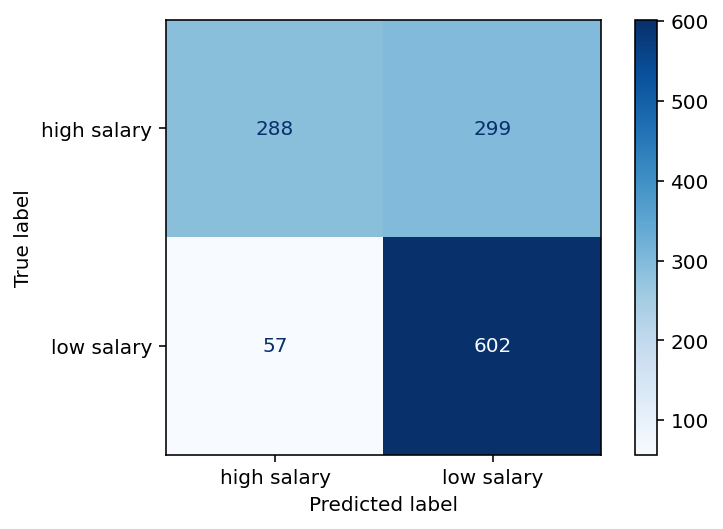

In [57]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

plot_confusion_matrix(gsv, Xv, yv, cmap='Blues', labels=['high salary','low salary'])
plt.show()

Adding additional features really improves the score. Our best estimator on the mean cross validated training score is now 75.4 compared to the original logistic regression score of 60.75 and the baseline accuracy of 52.89.

# 3.4 Decision Tree Classifier on more features

In [58]:
#using grid search to find the best decision tree classifier
# gridsearch params
dtc_paramsv = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01]
}

# set the gridsearch
modelv = DecisionTreeClassifier()
dtc_gsv = GridSearchCV(modelv, dtc_paramsv, cv=5, verbose=1, n_jobs=-2)

In [59]:
# use the gridearch model to fit the data
dtc_gsv.fit(Xv_train, yv_train)
dtc_bestv = dtc_gsv.best_estimator_
print(dtc_gsv.best_params_)
print(dtc_gsv.best_score_)

Fitting 5 folds for each of 1936 candidates, totalling 9680 fits
{'ccp_alpha': 0, 'max_depth': None, 'max_features': 1, 'min_samples_split': 2}
0.7771256281407035


The decision tree classifier once again performs better than logistic regression and adding more features helps it to perform even better.
Using the previous features, our score was 61.15 whereas it is now 77.71.

In [61]:
#show the features
fiv = pd.DataFrame({
    'feature': Xv.columns,
    'importance': dtc_bestv.feature_importances_
})

fiv.sort_values('importance', ascending=False, inplace=True)
fiv

,feature,importance
24,analyst,0.261564
15,research,0.091993
13,senior,0.086344
25,scientist,0.076491
18,manager,0.064943
21,graduate,0.043579
16,lecturer,0.037185
0,London,0.035921
14,lead,0.035011
3,Glasgow,0.034008


[Text(0, 0, 'analyst'),
 Text(1, 0, 'research'),
 Text(2, 0, 'senior'),
 Text(3, 0, 'scientist'),
 Text(4, 0, 'manager'),
 Text(5, 0, 'graduate'),
 Text(6, 0, 'lecturer'),
 Text(7, 0, 'London'),
 Text(8, 0, 'lead'),
 Text(9, 0, 'Glasgow'),
 Text(10, 0, 'head'),
 Text(11, 0, 'junior'),
 Text(12, 0, 'Edinburgh'),
 Text(13, 0, 'Leeds'),
 Text(14, 0, 'Birmingham'),
 Text(15, 0, 'Manchester'),
 Text(16, 0, 'specialist'),
 Text(17, 0, 'consultant'),
 Text(18, 0, 'Bristol'),
 Text(19, 0, 'Newcastle'),
 Text(20, 0, 'Belfast'),
 Text(21, 0, 'Nottingham'),
 Text(22, 0, 'Southampton'),
 Text(23, 0, 'intern'),
 Text(24, 0, 'Cardiff'),
 Text(25, 0, 'Sheffield')]

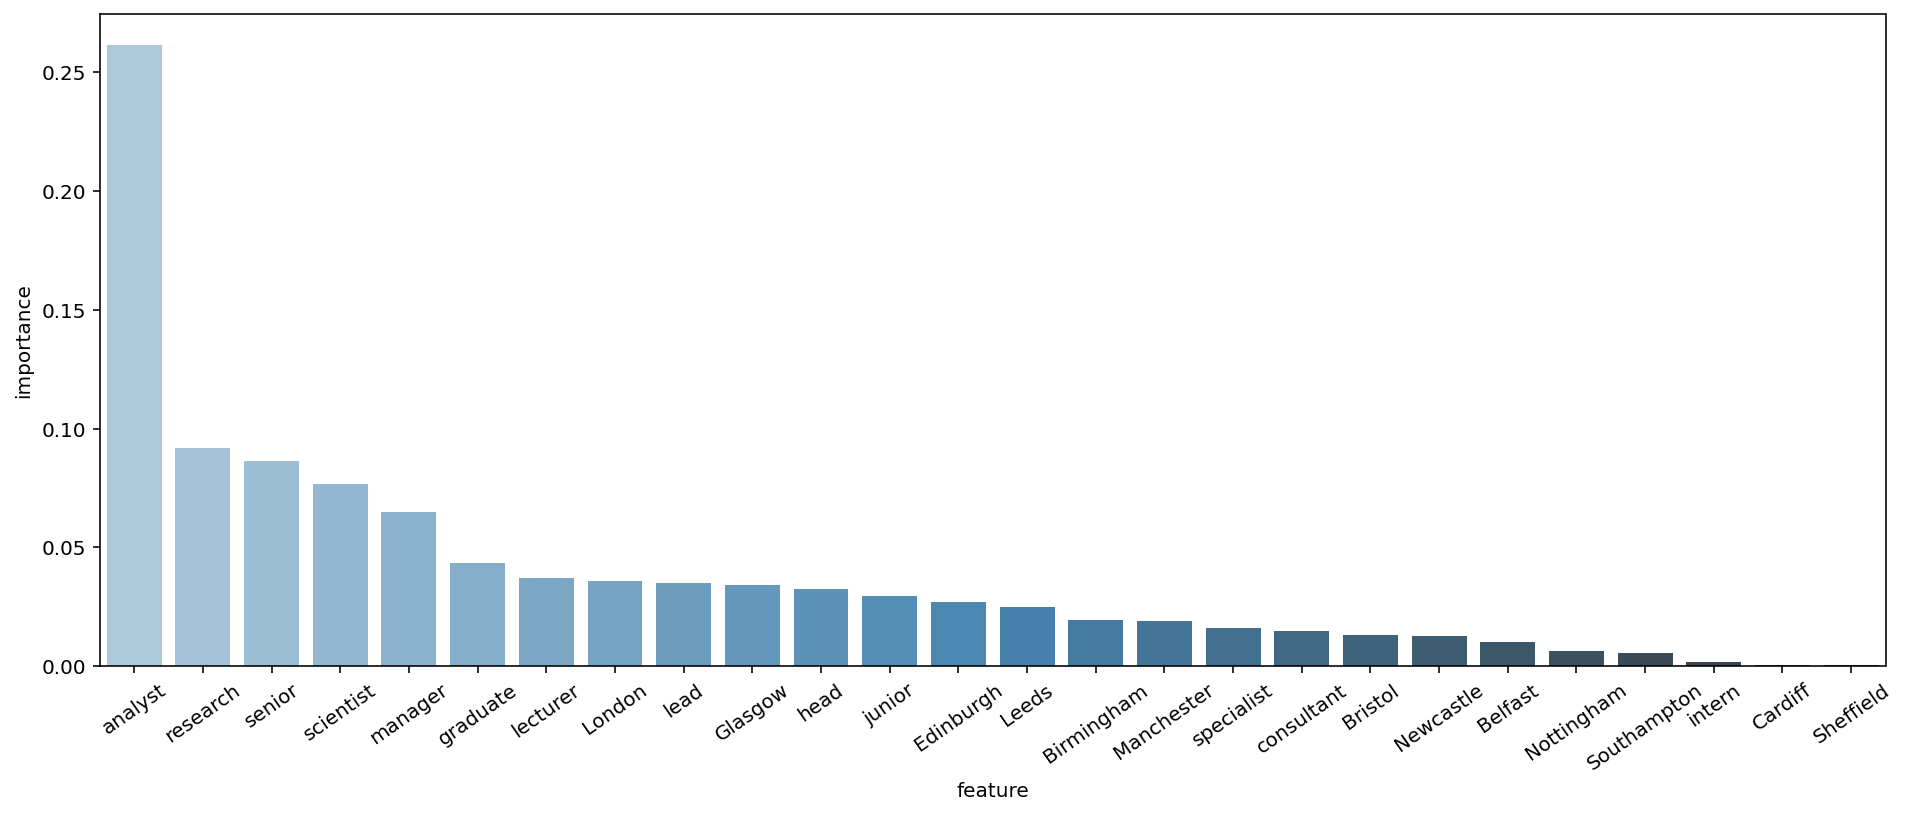

In [62]:
#show the features in a graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure().set_size_inches(16, 6)
fg = sns.barplot(x='feature', y='importance',data=fiv, palette="Blues_d")
fg.set_xticklabels(rotation=35, labels=fiv.feature)

With more features, analyst is the most important in determining whether a salary is high or low. London, which took top place in the previous dataset, is now in 7th place. 

In general, features from the title do better than from the location. 

# 4. Model Evaluation

### 4.1 Adjusting the model for the boss

In [63]:
# Get the predicted probabilities and explicitly name the columns:
Y_pp = pd.DataFrame(gsv.predict_proba(Xv), 
             columns=['min_salary', 'max_salary'])
Y_pp.head()

,min_salary,max_salary
0,0.565046,0.434954
1,0.499687,0.500313
2,0.293444,0.706556
3,0.369330,0.630670
4,0.369330,0.630670


In [64]:
#increase the threshold for the predicting class.
#this will reduce our false positive rate, but at the expense of a higher false negative rate
def predict_at_threshold(x, threshold=0.6):
    if x >= threshold:
        return 'high salary'
    else:
        return 'low salary'

In [65]:
#increase the threshold so you are more likely to predict min salary
Y_pp['pred_class_thresh'] = Y_pp.min_salary.apply(predict_at_threshold, 
                                                threshold=0.6)
Y_pp.head(20)

,min_salary,max_salary,pred_class_thresh
0,0.565046,0.434954,low salary
1,0.499687,0.500313,low salary
2,0.293444,0.706556,low salary
3,0.369330,0.630670,low salary
4,0.369330,0.630670,low salary
5,0.504630,0.495370,low salary
6,0.504630,0.495370,low salary
7,0.386775,0.613225,low salary
8,0.499687,0.500313,low salary
9,0.293444,0.706556,low salary


In [66]:
#see what the classification report would suggest
print(classification_report(y, Y_pp.pred_class_thresh))

              precision    recall  f1-score   support

 high salary       0.89      0.35      0.50       587
  low salary       0.62      0.96      0.76       659

    accuracy                           0.67      1246
   macro avg       0.76      0.66      0.63      1246
weighted avg       0.75      0.67      0.64      1246



In [67]:
#and see how this would change the predictions in each category
conmat = confusion_matrix(
    y, Y_pp.pred_class_thresh, labels=['high salary', 'low salary'])

confusion = pd.DataFrame(conmat, index=['high salary', 'low salary'],
                         columns=['predicted high salary', 'predicted low salary'])
confusion

,predicted high salary,predicted low salary
high salary,205,382
low salary,25,634


By increasing the threshold of the high salary predictions, we can make sure that the boss is more likely to tell a client he has a lower salary incorrectly than a higher one. Increasing the threshold implies that instead of baseline accuracy, we manually change this so that salaries have to be even higher to get over the threshold of saying that it is a high salary. 

It does mean that our model has less accuracy - we predict salary at 67% accuracy as compared to 77% and 74% for our training and test data in the previous Logistic Regression with all features. 

Furthermore, our precision and recall numbers also change. Originally precision was lower for high salary and higher for low salary and our new model has swapped this around. (Precision for the high salary was 80% and 73% for the train and test data compared with 89% in our new model. This can be compared to the precision for the low salary, which was 75% for both the train and test data and 62% for the new model).

Precision is the number of detected elements that are truly relevant. In this way, because in our new model fewer high salary predictions are made, they are more likely to be correct, therefore increasing the precision. However, it also means that more low salaries are detected as incorrect therefore lowering the precision.

Recall is a measure of how many items are detected as the correct item. In this way, recall increases for the low salary, as it can catch almost all of the items, whereas it decreases for the high salary where we are often wrongly predicting a low salary instead.

Recall in our train and test data original model for high salary was 68% and 72% respectively and this has decreased to 35% in our new model. At the same time, recall in our train and test data in the original model for the low salary was 85% and 76% respectively and this has increased to 96% in our new model. 

The tradeoff is between trying to detect all the salaries correctly versus avoiding telling clients that they will be receiving a high salary, whereas in fact they'll recieve a lower one. 

In this way, if the boss wants a model that's going to predict more clients to be in low paying jobs, then a model with lower accuracy that has high precision for the high salary (an increase of false negatives). 


In [68]:
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

### 4.2 Plotting the ROC curve for the original & improved model

#### 4.2.1 ROC original model 

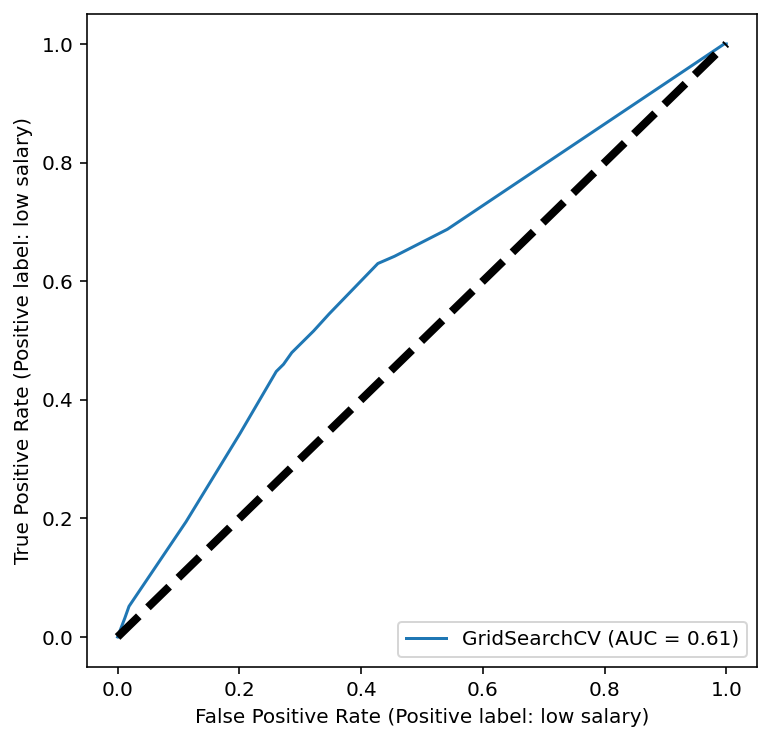

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(gs, X, y, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

In [70]:
roc_auc_score(y, gs.predict_proba(X)[:, 1])

0.6117898421282568

##### 4.2.2. ROC for the improved model

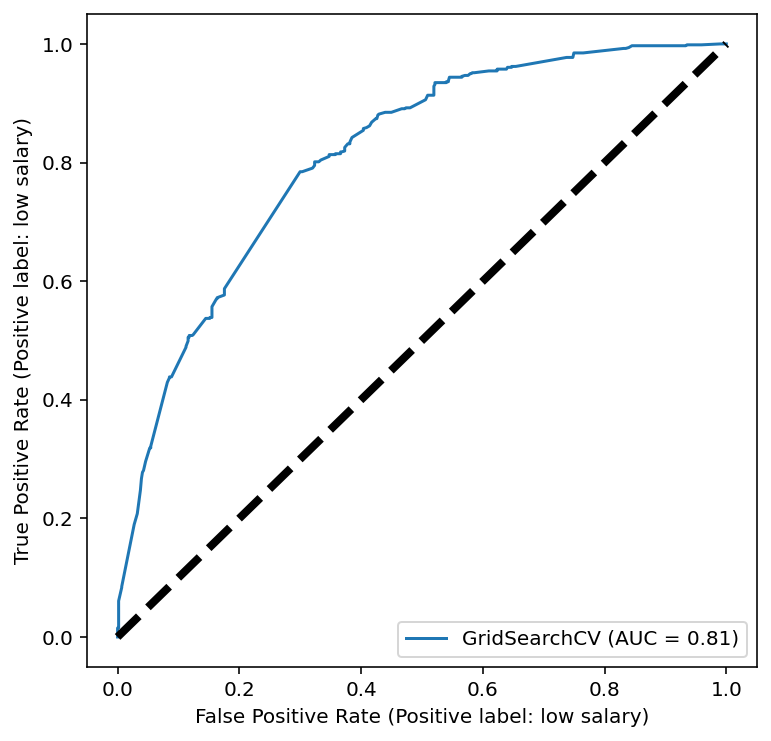

In [71]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(gsv, Xv, yv, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

As the ROC plots the true positive rate vs the false positive rate, both our models are better than the baseline accuracy of the black dotted line. 

Our new model with additional feaures performs even better at accoutning for more as the blue curve is even higher above the baseline with a larger area. 

### 4.3 Plotting the precision-recall curve for the original & improved model

#### 4.3.1 Precision-recall curve original model 

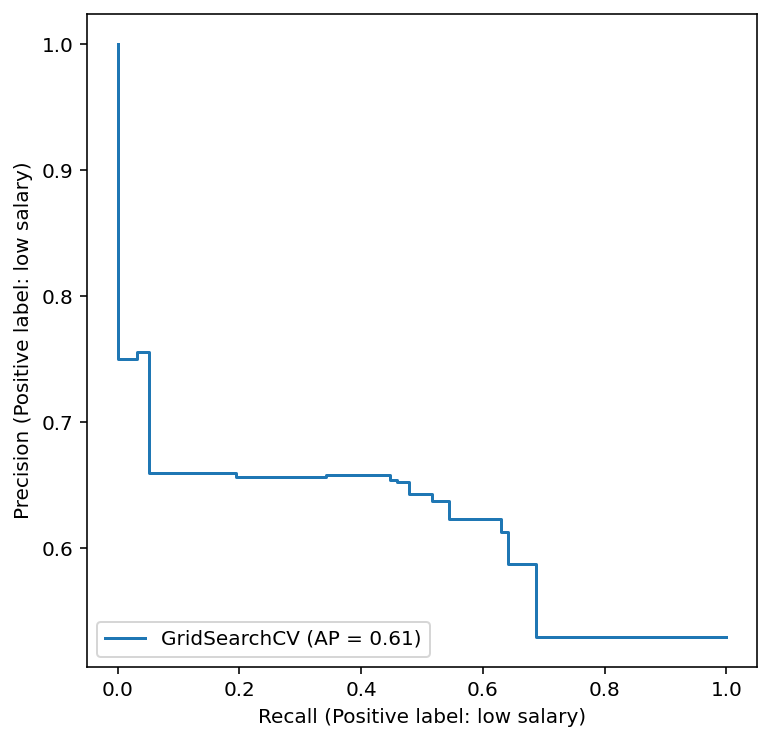

In [72]:
# Plot of a precision-recall curve for low salary
plt.fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(gs, X, y, ax=ax)
plt.show()

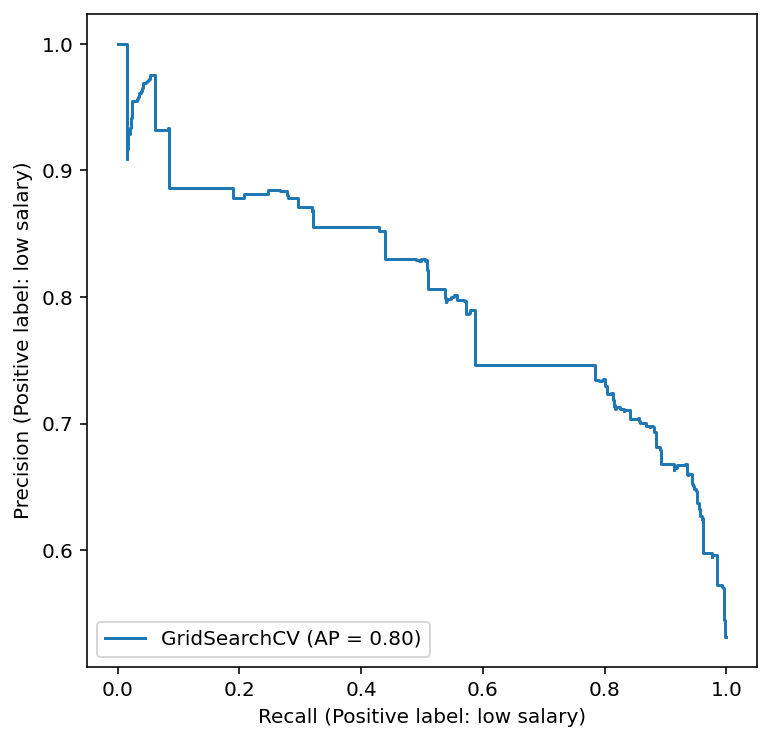

In [73]:
# Plot of a precision-recall curve for low salary
plt.fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(gsv, Xv, yv, ax=ax)
plt.show()

As the second graph has a bigger area under the curve, as we increase the threshold for recall in low salary, we still have a higher recall value and therefore the second model with more features is better. 

# 5. Business Summary & Evaluation 

Company X has asked us to discover what terms are relevant when hiring new candidates in the data field and which impact salary the most. 

Firstly we used the Indeed website to find listings on data science and data analytics jobs in a number of cities in the UK. We did this by scraping the website, taking relevant data, and downloading the information into a spreadsheet. 

We then needed to make sure that the data was in good working order, and as such got rid of multiple entries, deleted job posts that did not have any salary information, and found mean salaries if a range was given. 
We also made sure that we could search for relevant information by changing some words e.g. ‘Buxton’ for ‘Sheffield.’ 

Once our data was good to go, we could then investigate the relevant factors related to the salary. Rather than identifying specific numbers, we split our salary up into ‘high’ and ‘low’ based on the median salary of all the jobs. 

We could then link this to certain factors, focusing on the location of the job in the first instance. Through modelling, initially through Logistic Regression, we determined the probability of a job description being in either the high or low job salary category depending on these features. We found that we could predict these salary categories better than chance. 

To ensure the model was robust, we performed what’s known as a Grid Search prior to the Logistic Regression. A Grid Search searches through a number of different versions of the Regression model to determine which will perform the best, and this can then be applied. We also used Regularisation to ensure that our model doesn’t overfit - that is where it specifically fits the datapoints of our data, rather than an overall model. 

Our Logistic Regression model was better than if we just flipped a coin and decided which salary band a job was in. 

Secondly, we performed a Decision Tree on the data where we select branches of the data and evaluate and compare them to select the best course of action. Once again we performed a Grid Search to determine the best performing model and found that this gave us an even better result than Logistic Regression.

The most useful cities for determining whether the salary was going to be low or high were London, Manchester, Nottingham, Belfast and Glasgow. 

Secondly, we investigated whether our models could be enhanced further by adding additional features with which to measure salary by. We chose information relating to the seniority of candidates, such as Manager, Lead and Junior, as well as whether the job posting was asking for an analyst or a scientist. 

We performed the same two analyses as above, and for that these additional features did enhance our results. Both model gave us better results, with the Decision Tree coming out top.

This new model also showed us that there were other factors at play over and above the cities as described earlier, which could predict whether a salary was going to be described as either high or low. These were analyst, senior, research, lead, scientist and consultant. 

As the boss wanted to ensure that he told clients that they were gaining a lower salary to be on the safe side, when some would in fact gain a higher salary, we looked at changing the thresholds of the model and looking at how this would affect the results.

This does decrease the accuracy of the results we get - more clients who actually gain a high salary are told they would get a low salary, however it does improve what’s known as the precision for the high salary. In this way, if we are to tell someone they are to receive a high salary, with the new threshold they are more likely to do so. 

However, there are a number of limitations and risks with our models.

Limitations include the fact that only 13 UK cities were scraped. An increase in our number of datapoints by either investigating more areas in the UK or further afield, would generate more accurate findings. 

Other features were not included in our model which could have been looked at. These include the industry the job posting is in and the requirements needed for the job. 

Lastly, data was only scraped over a short time period of a week, and therefore was not reflective of the UK job market as a whole. Scraping over the course of a month or a year could generate different findings.

Risks include the fact that we only ultimately used job listings that had salary information. This may have caused a bias in our model as it may be the case that job listing without salary information incur a higher or lower salary distribution. 

Secondly, using the median for our threshold of low versus high salary may not have been the most appropriate, especially as the boss was worried about telling clients they were going to receive a high salary when they were not. A more appropriate approach may have been to divide the salaries into the 25% quartile and 75% quartile range, where 25% of the salaries are defined as high and 75% of the salaries are defined as low. 